In [44]:
import sys
sys.path.insert(0, '../..')
import json

youtube_json_file = '/home/lr/dataset/YouTube-VOS/train/meta.json'
with open(youtube_json_file, 'r') as f:
    meta_data = json.load(f)

youtube_json_file2 = '/home/lr/dataset/YouTube-VOS/train/generated_meta.json'
with open(youtube_json_file2, 'r') as f:
    g_data = json.load(f)

In [45]:
from collections import defaultdict
youtube_obj_class = defaultdict(list)
youtube_obj_pixel = defaultdict(int)
for k,v in meta_data['videos'].items():
    for k2,o in v['objects'].items():
        c = o['category']
        youtube_obj_class[c].append(k)
    vi = g_data[k]
    vos = vi['obj_sizes']
    for frame_id, info in vos.items():
        for obj, size in info.items():
            category = v['objects'][obj]['category']
            youtube_obj_pixel[category] += size

统计整个数据集每个object类别出现的频次成柱状图

There are 65 categories


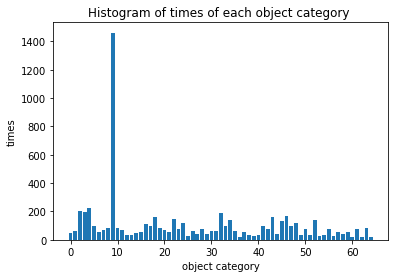

Max times object category: person


In [46]:
import matplotlib.pyplot as plt
import numpy as np

print('There are {} categories'.format(len(youtube_obj_class.keys())))

category = youtube_obj_class.keys()

x = np.array(list([len(l) for k,l in youtube_obj_class.items()]))

# the histogram of the data
plt.bar(range(len(category)), x)

plt.xlabel('object category')
plt.ylabel('times')
plt.title('Histogram of times of each object category ')

# Tweak spacing to prevent clipping of ylabel
plt.show()

max_idx = np.argmax(x)
print('Max times object category:', list(category)[max_idx])

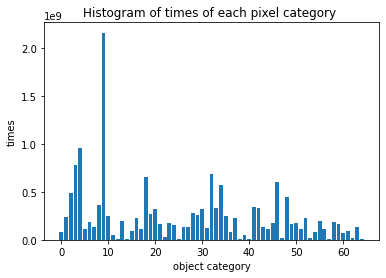

In [47]:
category = youtube_obj_pixel.keys()

x = np.array(list([l for k,l in youtube_obj_pixel.items()]))

# the histogram of the data
plt.bar(range(len(category)), x)

plt.xlabel('object category')
plt.ylabel('times')
plt.title('Histogram of times of each pixel category ')

# Tweak spacing to prevent clipping of ylabel
plt.show()